In [70]:
import numpy as np
import pandas as pd
import pickle
#import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
#Retrieve pickle object
fileObj = open('data_algos.pkl', 'rb')
all_generations = pickle.load(fileObj)
fileObj.close()

In [72]:
#creating one DataFrame for each selection method
generations_df = pd.DataFrame(all_generations)
#checking the results
generations_df.sample(5)

,radius,generation,fitness,selection_type,pop_size
104394,0.470588,221,0.007758,Random Selection,65
194734,15.058824,408,0.000700,Random Selection,85
399102,1.647059,354,0.018701,Ranked Selection,75
648603,1.882353,348,0.018471,Wheel Selection,75
204699,7.647059,23,0.002665,Random Selection,95


In [73]:
#Sample Statistics
generations_df.groupby(by=['selection_type', 'generation']).describe(percentiles = [0.5])


radius                                            \
                             count       mean       std       min        50%   
selection_type   generation                                                    
Random Selection 0           500.0  15.610824  8.496030  0.117647  16.000000   
                 1           500.0  15.809647  8.245180  0.117647  15.764706   
                 2           500.0  15.439059  8.216092  0.117647  15.882353   
                 3           500.0  16.067765  8.175818  0.117647  16.823529   
                 4           500.0  16.059059  8.113231  0.117647  16.941176   
...                            ...        ...       ...       ...        ...   
Wheel Selection  495         500.0   1.884471  0.560611  1.529412   1.882353   
                 496         500.0   1.863765  0.526147  0.117647   1.882353   
                 497         500.0   1.838824  0.249737  1.529412   1.882353   
                 498         500.0   1.833176  0.186176  1.529412   1.882353   
                 499         500.0   1.872706  0.705915  1.529412   1.882353   

                                       fitness                                \
                                   max   count      mean       std       min   
selection_type   generation                                                    
Random Selection 0           30.000000   500.0  0.002627  0.004445  0.000177   
                 1           29.647059   500.0  0.002323  0.004022  0.000181   
                 2           30.000000   500.0  0.002603  0.004472  0.000177   
                 3           29.882353   500.0  0.002311  0.004051  0.000178   
                 4           30.000000   500.0  0.002305  0.004059  0.000177   
...                                ...     ...       ...       ...       ...   
Wheel Selection  495          9.411765   500.0  0.018239  0.001459  0.001776   
                 496          9.294118   500.0  0.018283  0.001432  0.001821   
                 497          5.764706   500.0  0.018375  0.000686  0.004562   
                 498          2.823529   500.0  0.018389  0.000380  0.014017   
                 499         16.588235   500.0  0.018320  0.001065  0.000577   

                                                pop_size                   \
                                  50%       max    count  mean        std   
selection_type   generation                                                 
Random Selection 0           0.000620  0.018701    500.0  66.5  23.534182   
                 1           0.000639  0.018668    500.0  66.5  23.534182   
                 2           0.000629  0.018701    500.0  66.5  23.534182   
                 3           0.000561  0.018701    500.0  66.5  23.534182   
                 4           0.000553  0.018701    500.0  66.5  23.534182   
...                               ...       ...      ...   ...        ...   
Wheel Selection  495         0.018471  0.018701    500.0  66.5  23.534182   
                 496         0.018471  0.018701    500.0  66.5  23.534182   
                 497         0.018471  0.018701    500.0  66.5  23.534182   
                 498         0.018471  0.018701    500.0  66.5  23.534182   
                 499         0.018471  0.018701    500.0  66.5  23.534182   

                                              
                             min   50%   max  
selection_type   generation                   
Random Selection 0           5.0  75.0  95.0  
                 1           5.0  75.0  95.0  
                 2           5.0  75.0  95.0  
                 3           5.0  75.0  95.0  
                 4           5.0  75.0  95.0  
...                          ...   ...   ...  
Wheel Selection  495         5.0  75.0  95.0  
                 496         5.0  75.0  95.0  
                 497         5.0  75.0  95.0  
                 498         5.0  75.0  95.0  
                 499         5.0  75.0  95.0  

[1500 rows x 18 columns]

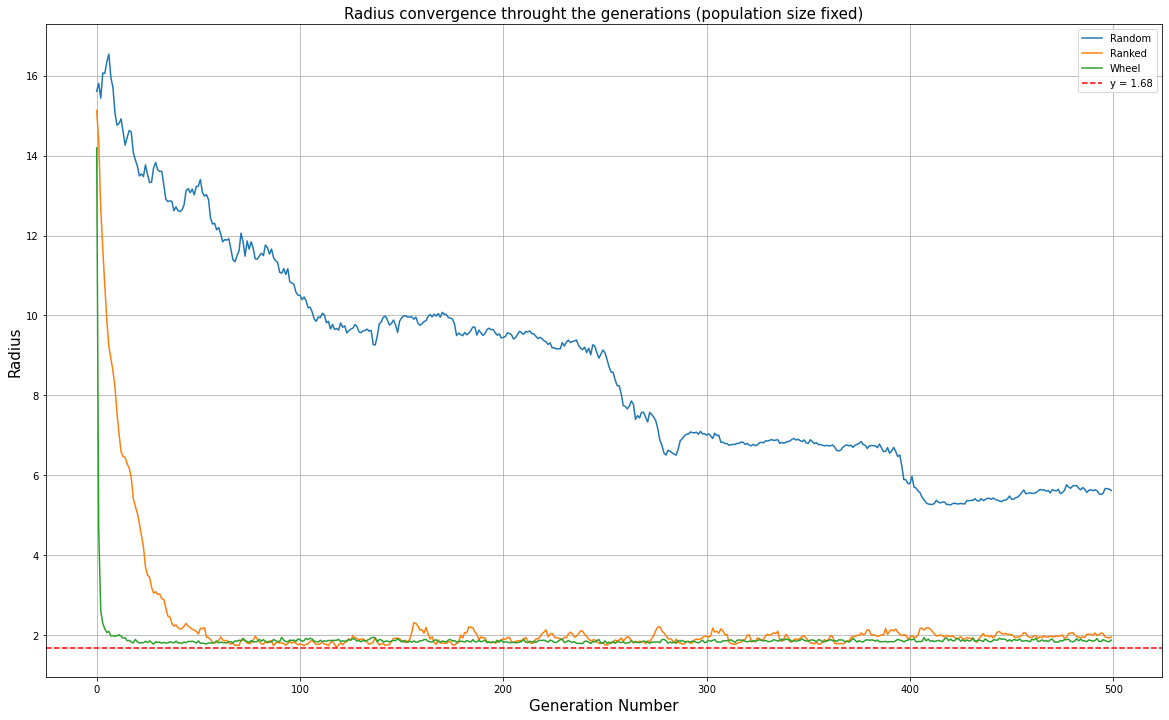

In [74]:
grouped = generations_df.groupby(by=['selection_type', 'generation']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped.loc['Random Selection', 'fitness']))
y1 = grouped.loc['Random Selection', 'radius']
y2 = grouped.loc['Ranked Selection', 'radius']
y3 = grouped.loc['Wheel Selection', 'radius']

plt.title('Radius convergence throught the generations (population size fixed)',fontsize=15)
plt.xlabel('Generation Number',fontsize=15)
plt.ylabel('Radius',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  
plt.grid()
plt.axhline(y=1.6841, color='r', linestyle='--', label='y = 1.68')
plt.legend()

plt.show()

In [75]:
grouped.loc['Random Selection', 'radius']

generation
0      15.610824
1      15.809647
2      15.439059
3      16.067765
4      16.059059
         ...    
495     5.547765
496     5.668706
497     5.663765
498     5.652471
499     5.620235
Name: radius, Length: 500, dtype: float64

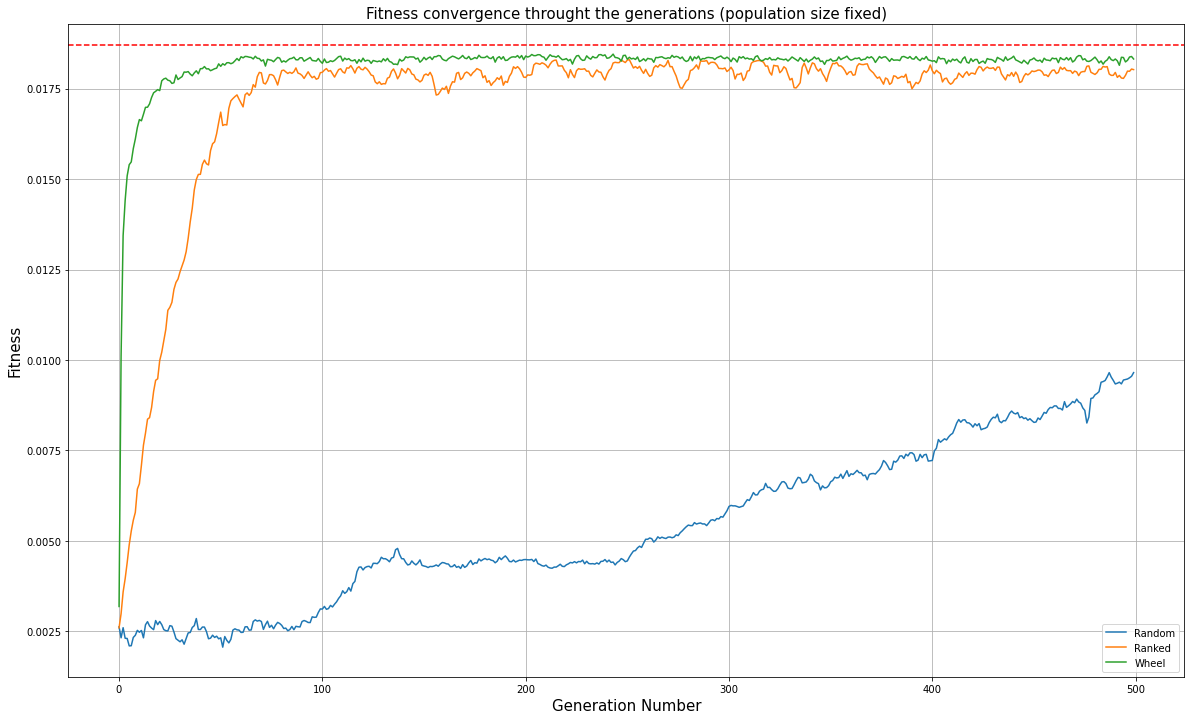

In [76]:
grouped = generations_df.groupby(by=['selection_type', 'generation']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped.loc['Random Selection', 'fitness']))
y1 = grouped.loc['Random Selection', 'fitness']
y2 = grouped.loc['Ranked Selection', 'fitness']
y3 = grouped.loc['Wheel Selection', 'fitness']

plt.title('Fitness convergence throught the generations (population size fixed)',fontsize=15)
plt.xlabel('Generation Number',fontsize=15)
plt.ylabel('Fitness',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  
plt.grid()
plt.legend()
plt.axhline(y=0.018709891942760622, color='r', linestyle='--', label='y = 0,0187')

plt.show()

In [77]:
generations_df.groupby(by=['selection_type', 'pop_size']).describe(percentiles = [0.5])

radius                                            \
                             count       mean       std       min        50%   
selection_type   pop_size                                                      
Random Selection 5          2500.0   3.934824  1.241807  0.117647   3.882353   
                 15         7500.0   4.401443  2.241229  0.470588   4.235294   
                 25        12500.0   4.207680  1.708030  0.235294   4.117647   
                 35        17500.0   9.095341  4.480158  0.470588  11.882353   
                 45        22500.0   4.668675  6.093784  0.117647   2.000000   
                 55        27500.0  11.477095  6.625921  0.117647  15.176471   
                 65        32500.0   3.189984  5.801632  0.117647   0.588235   
                 75        37500.0   7.836860  7.498048  0.117647   2.352941   
                 85        42500.0  16.562226  2.634944  0.117647  15.176471   
                 95        47500.0   8.147817  2.341146  0.117647   7.529412   
Ranked Selection 5          2500.0   6.084235  6.622005  0.235294   2.117647   
                 15         7500.0   4.216722  2.080515  0.588235   3.764706   
                 25        12500.0   2.203878  1.827159  0.117647   1.882353   
                 35        17500.0   2.160934  1.651352  0.117647   1.882353   
                 45        22500.0   1.959948  2.092986  0.117647   1.647059   
                 55        27500.0   2.080406  2.335706  0.117647   1.647059   
                 65        32500.0   2.152405  2.242336  0.117647   1.647059   
                 75        37500.0   2.322933  3.408782  0.117647   1.647059   
                 85        42500.0   2.107552  2.398645  0.117647   1.647059   
                 95        47500.0   2.134489  2.515212  0.117647   1.647059   
Wheel Selection  5          2500.0   2.298024  0.901256  0.352941   2.235294   
                 15         7500.0   1.779749  1.058059  0.117647   1.764706   
                 25        12500.0   2.079501  1.001717  0.117647   2.000000   
                 35        17500.0   1.685506  0.887455  0.117647   1.647059   
                 45        22500.0   2.065312  1.003941  0.117647   1.882353   
                 55        27500.0   1.784462  0.943038  0.117647   1.764706   
                 65        32500.0   1.978740  0.941680  0.117647   1.882353   
                 75        37500.0   2.007225  0.911194  0.117647   1.882353   
                 85        42500.0   1.584089  0.872284  0.117647   1.529412   
                 95        47500.0   1.986100  0.932809  0.117647   1.882353   

                                     generation                          \
                                 max      count   mean         std  min   
selection_type   pop_size                                                 
Random Selection 5         22.117647     2500.0  249.5  144.366155  0.0   
                 15        29.411765     7500.0  249.5  144.346902  0.0   
                 25        28.117647    12500.0  249.5  144.343052  0.0   
                 35        30.000000    17500.0  249.5  144.341403  0.0   
                 45        29.529412    22500.0  249.5  144.340486  0.0   
                 55        30.000000    27500.0  249.5  144.339903  0.0   
                 65        30.000000    32500.0  249.5  144.339499  0.0   
                 75        30.000000    37500.0  249.5  144.339203  0.0   
                 85        29.764706    42500.0  249.5  144.338977  0.0   
                 95        30.000000    47500.0  249.5  144.338798  0.0   
Ranked Selection 5         25.058824     2500.0  249.5  144.366155  0.0   
                 15        27.647059     7500.0  249.5  144.346902  0.0   
                 25        30.000000    12500.0  249.5  144.343052  0.0   
                 35        29.176471    17500.0  249.5  144.341403  0.0   
                 45        29.058824    22500.0  249.5  144.340486  0.0   
                 55        29.882353 

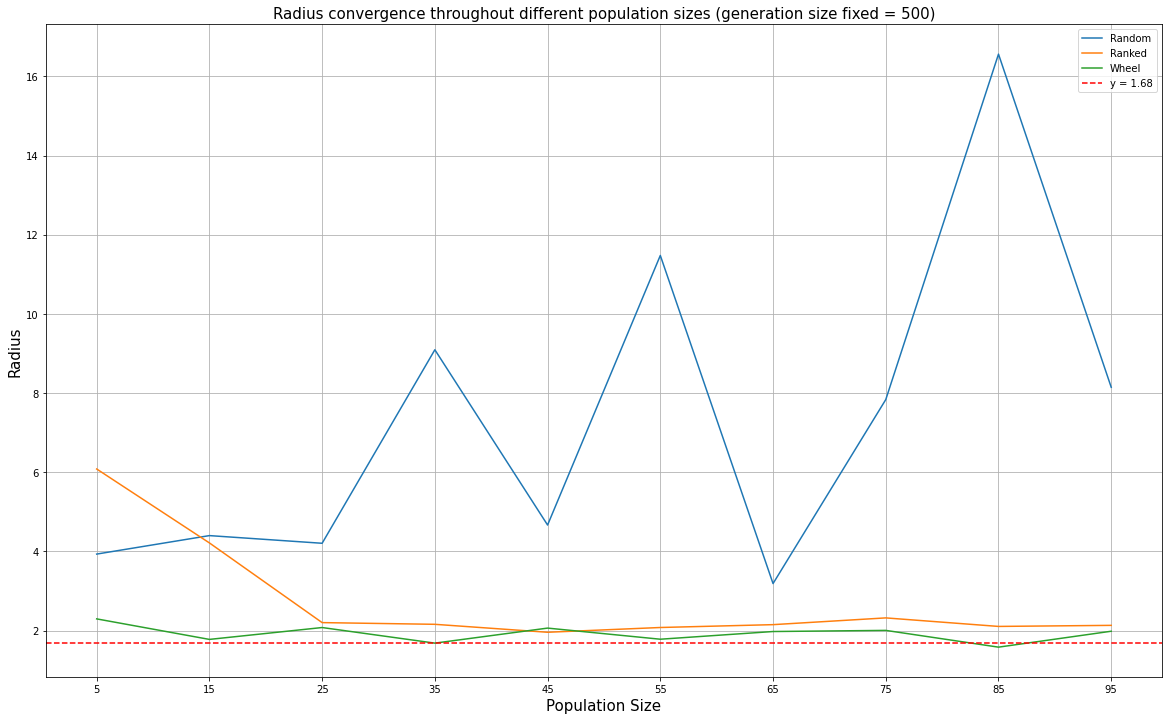

In [78]:
grouped_pop = generations_df.groupby(by=['selection_type', 'pop_size']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped_pop.loc['Random Selection', 'radius']))
y1 = grouped_pop.loc['Random Selection', 'radius']
y2 = grouped_pop.loc['Ranked Selection', 'radius']
y3 = grouped_pop.loc['Wheel Selection', 'radius']

plt.title('Radius convergence throughout different population sizes (generation size fixed = 500)',fontsize=15)
plt.xlabel('Population Size',fontsize=15)
plt.ylabel('Radius',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  

plt.grid()
plt.axhline(y=1.6841, color='r', linestyle='--', label='y = 1.68')
plt.legend()

plt.xticks(range(len(grouped_pop.loc['Random Selection', 'radius'])), labels=grouped_pop.loc['Random Selection', 'radius'].index)
plt.show()

In [79]:
grouped_pop.loc['Random Selection', 'radius'].values

array([ 3.93482353,  4.40144314,  4.20768   ,  9.09534118,  4.66867451,
       11.47709519,  3.18998371,  7.83685961, 16.56222561,  8.14781672])

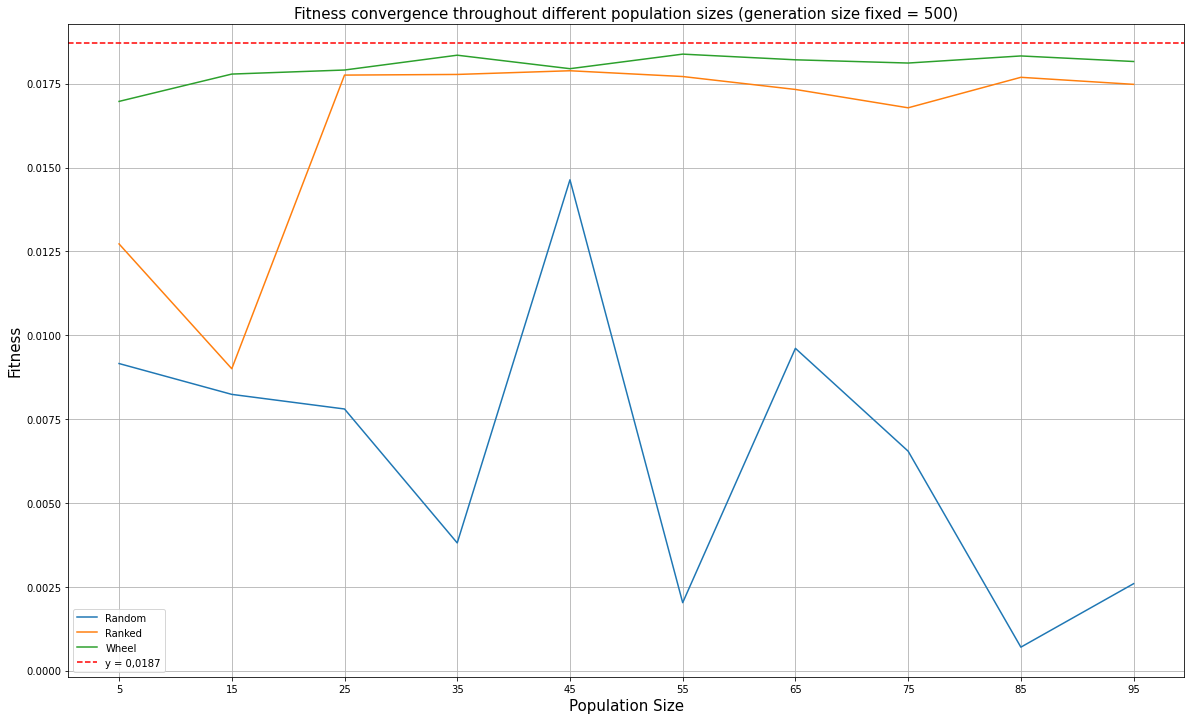

In [80]:
grouped_pop = generations_df.groupby(by=['selection_type', 'pop_size']).mean()
#create plots

plt.rcParams["figure.figsize"]=(20,12)

x1 = range(len(grouped_pop.loc['Random Selection', 'fitness']))
y1 = grouped_pop.loc['Random Selection', 'fitness']
y2 = grouped_pop.loc['Ranked Selection', 'fitness']
y3 = grouped_pop.loc['Wheel Selection', 'fitness']

plt.title('Fitness convergence throughout different population sizes (generation size fixed = 500)',fontsize=15)
plt.xlabel('Population Size',fontsize=15)
plt.ylabel('Fitness',fontsize=15)

plt.plot(x1,y1,label = 'Random')
plt.plot(x1,y2,label = 'Ranked') 
plt.plot(x1,y3, label = 'Wheel')  
plt.grid()
plt.axhline(y=0.018709891942760622, color='r', linestyle='--', label='y = 0,0187')
plt.xticks(range(len(grouped_pop.loc['Random Selection', 'radius'])), labels=grouped_pop.loc['Random Selection', 'radius'].index)
plt.legend()

plt.show()